In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
g0 = 9.80665

In [48]:
import numpy as np



class Rocket:
    def __init__(self, m0, mf, isp, thrust, initial_altitude, initial_vx, initial_vy, initial_pitch_angle):
        self.mass = m0  # kg
        self.mf = mf
        self.isp = isp  # s
        self.vex = isp * g0
        self.thrust = thrust  # N
        self.mdot = self.thrust / (self.vex)
        self.altitude = initial_altitude  # m
        self.vx = initial_vx  # m/s
        self.vy = initial_vy  # m/s
        self.pitch_angle_deg = initial_pitch_angle  # degrees

        self.time = [0]  # storing time
        self.masses = [m0]
        self.x_positions = [0]  # storing x positions over time
        self.y_positions = [initial_altitude]  # storing y positions over time
        self.x_velocities = [initial_vx]  # storing x velocities over time
        self.y_velocities = [initial_vy]  # storing y velocities over time
        self.pitch_angles_deg = [initial_pitch_angle]  # storing pitch angles over time

    def guidance(self):
        # Placeholder guidance function (here, pitch angle remains constant)
        pass

    def simulate(self, time_step, total_time):
        current_time = 0
        sim_end = False
        while (not sim_end):

            # Update time
            current_time += time_step
            self.time.append(current_time)

            m1 = self.mass - self.mdot

            if (m1 <= mf):
                m1 = mf
                self.mdot = 0

            self.mass = m1
        
            self.masses.append(self.mass)
            
            # Update pitch angle from degrees to radians
            pitch_angle_rad = np.deg2rad(self.pitch_angle_deg)

            # Calculate distance from the center of the Earth
            r = 6371000 + self.altitude  # Radius of the Earth + altitude

            # Calculate acceleration due to gravity
            mu = 3.986e14  # Gravitational parameter of Earth (m^3/s^2)
            gravity = mu / r**2  # m/s^2

            # Thrust components
            thr = self.thrust

            if (self.mdot == 0):
                thr = 0
            
            thrust_x = thr * np.cos(pitch_angle_rad)
            thrust_y = thr * np.sin(pitch_angle_rad)

            # Acceleration components
            ax = thrust_x / self.mass
            ay = thrust_y / self.mass - gravity  # gravity varies with altitude

            # Update velocities
            self.vx += ax * time_step
            self.vy += ay * time_step

            # Update positions
            self.x_positions.append(self.x_positions[-1] + self.vx * time_step)
            self.y_positions.append(self.y_positions[-1] + self.vy * time_step)

            # Update velocities
            self.x_velocities.append(self.vx)
            self.y_velocities.append(self.vy)


            # Update pitch angle (not implemented in this example)

            # Append pitch angle in degrees
            self.pitch_angles_deg.append(self.pitch_angle_deg)

            #end conditions
            sim_end = (current_time >= total_time) or (self.y_positions[-1] <= 0)

    def plot_results(self):
        fig, axs = plt.subplots(4, figsize=(10, 16))

        # Plot trajectory
        axs[0].plot(self.x_positions, self.y_positions)
        axs[0].set_xlabel('X Position (m)')
        axs[0].set_ylabel('Y Position (m)')
        axs[0].set_title('Rocket Trajectory')

        # Plot pitch angle
        axs[1].plot(self.time, self.masses)
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('mass')

        # Plot velocities
        axs[2].plot(self.time, self.x_velocities, label='X Velocity')
        axs[2].plot(self.time, self.y_velocities, label='Y Velocity')
        axs[2].set_xlabel('Time')
        axs[2].set_ylabel('Velocity (m/s)')
        axs[2].set_title('Rocket Velocities')
        axs[2].legend()

        # Plot pitch angle
        axs[3].plot(self.time, self.pitch_angles_deg)
        axs[3].set_xlabel('Time')
        axs[3].set_ylabel('Pitch Angle (degrees)')
        axs[3].set_title('Pitch Angle over Time')

        plt.tight_layout()
        plt.show()


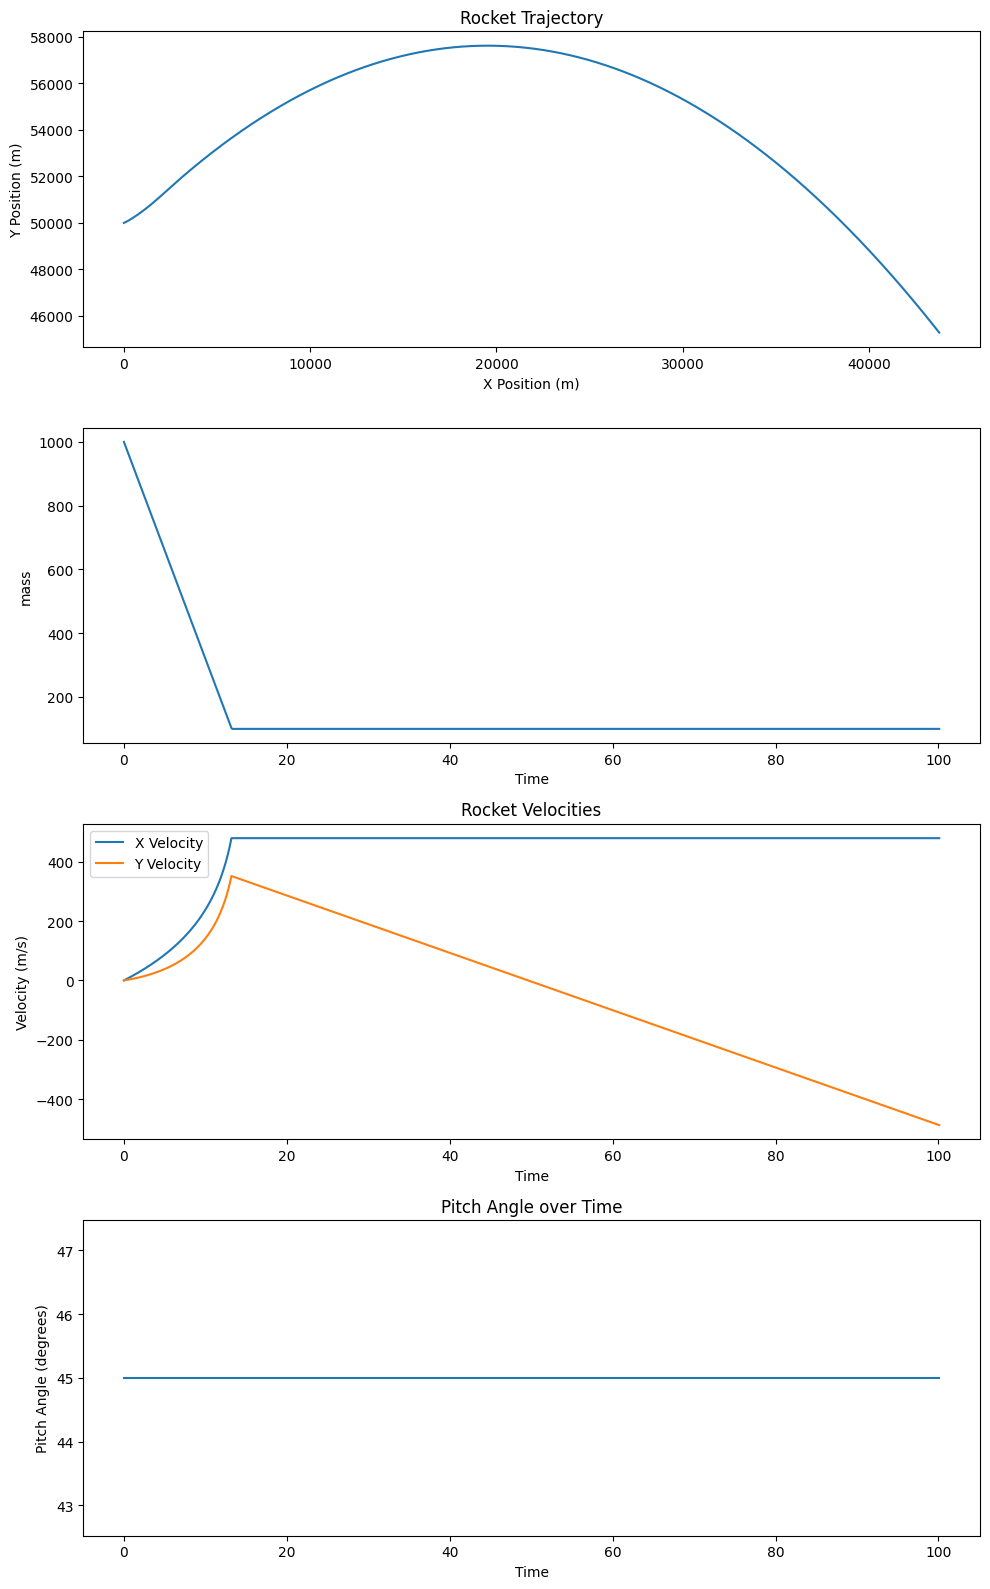

In [49]:

# Define initial conditions and rocket parameters
mass = 1000  # kg
mf = 100
isp = 300  # s
thrust = 20000  # N
initial_altitude = 50000  # m
initial_vx = 0  # m/s
initial_vy = 0  # m/s
pitch_angle = 45

# Create rocket object
rocket = Rocket(mass, mf, isp, thrust, initial_altitude, initial_vx, initial_vy, pitch_angle)

# Simulation parameters
time_step = 0.1  # s
total_time = 100  # s

# Simulate rocket flight
rocket.simulate(time_step, total_time)

# Plot trajectory
rocket.plot_results()


